In [28]:
! pip install geojson

In [3]:
import folium
import geopandas as gpd
import pandas as pd
import json
import geojson
import random
import requests
import os
import numpy as np
import geoplot as gplt
from branca.colormap import linear
import plotly.express as px
import matplotlib.pyplot as plt #if using matplotlib

In [4]:
#import plotly.io as pio  
#pio.renderers.default = 'browser' #map in the browser

In [5]:
#rename one of the columns
#map_df = map_df.rename({'DISTRICT_N': 'District'}, axis = 'columns')
#drop a column
#map_df = map_df.drop(columns = 'DISTRICT_I')
#replace the values in the dataframe
#map_df = map_df.replace(['Counties/Manukau','Northland'],['Counties Manukau','Northen'])

# Import data

In [6]:
gdf = gpd.read_file("C:/capes_sql/vacunesxcent.shp")
gdf.head(5)

,codi_ine_6,provincia1,codi_costa,codi_ptgc_,comarca1,id,nom_muni,municipi,codi_cadas,codi_aft,_feature_i,codi_ptgc,cap_muni,codiine,Total,Municipi_1,Taxa_vacun,geometry
0,0.0,None,0.0,None,None,301.0,PUIG-REIG,081751,None,None,4,None,Puig-reig,08175,4295,PUIG-REIG,108.521537,"POLYGON ((1.86341 41.91648, 1.86089 41.92024, ..."
1,0.0,None,0.0,None,None,309.0,BASSELLA,250447,None,None,7,None,Bassella,25044,217,BASSELLA,NaN,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9..."
2,0.0,None,0.0,None,None,310.0,OSOR,171169,None,None,8,None,Osor,17116,428,OSOR,82.009346,"POLYGON ((2.61606 41.92397, 2.61418 41.92067, ..."
3,0.0,None,0.0,None,None,311.0,GURB,081000,None,None,9,None,Gurb,08100,2713,GURB,99.373387,"POLYGON ((2.28961 41.96064, 2.28857 41.96009, ..."
4,0.0,None,0.0,None,None,314.0,ORISTÀ,081516,None,None,17,None,Oristà,08151,549,ORISTÀ,95.810565,"MULTIPOLYGON (((2.13624 41.95468, 2.13621 41.9..."


In [7]:
print(gdf.dtypes)

codi_ine_6      object
provincia1      object
codi_costa      object
codi_ptgc_      object
comarca1        object
id              object
nom_muni        object
municipi        object
codi_cadas      object
codi_aft        object
_feature_i      object
codi_ptgc       object
cap_muni        object
codiine         object
Total            int64
Municipi_1      object
Taxa_vacun     float64
geometry      geometry
dtype: object


<AxesSubplot:>

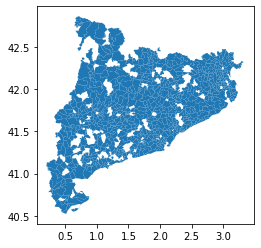

In [8]:
gdf.plot()

# Prepare the data for visualisation

In [9]:
gdf = gdf.drop(columns=['codi_ine_6','codi_costa', 'codi_ptgc_', 'comarca1', 'codi_aft','codi_ptgc',  '_feature_i', 'codi_cadas'])
gdf.head(2)

,provincia1,id,nom_muni,municipi,cap_muni,codiine,Total,Municipi_1,Taxa_vacun,geometry
0,None,301.0,PUIG-REIG,081751,Puig-reig,08175,4295,PUIG-REIG,108.521537,"POLYGON ((1.86341 41.91648, 1.86089 41.92024, ..."
1,None,309.0,BASSELLA,250447,Bassella,25044,217,BASSELLA,NaN,"MULTIPOLYGON (((1.35053 41.99408, 1.34875 41.9..."


In [10]:
gdf = gdf.fillna(0)
gdf['Taxa_vacun'] = gdf['Taxa_vacun'].astype(int)

In [11]:
gdf.head(1)

,provincia1,id,nom_muni,municipi,cap_muni,codiine,Total,Municipi_1,Taxa_vacun,geometry
0,0,301.0,PUIG-REIG,081751,Puig-reig,08175,4295,PUIG-REIG,108,"POLYGON ((1.86341 41.91648, 1.86089 41.92024, ..."


In [12]:
#outliers 
gdf["Taxa_vacun"].max()

140

In [13]:
 gdf = gdf[gdf['Taxa_vacun'] <= 200]

# Visualise with Matplotlib:

Text(0.5, 1.0, 'Vacunes administrades per cada 100 habitants')

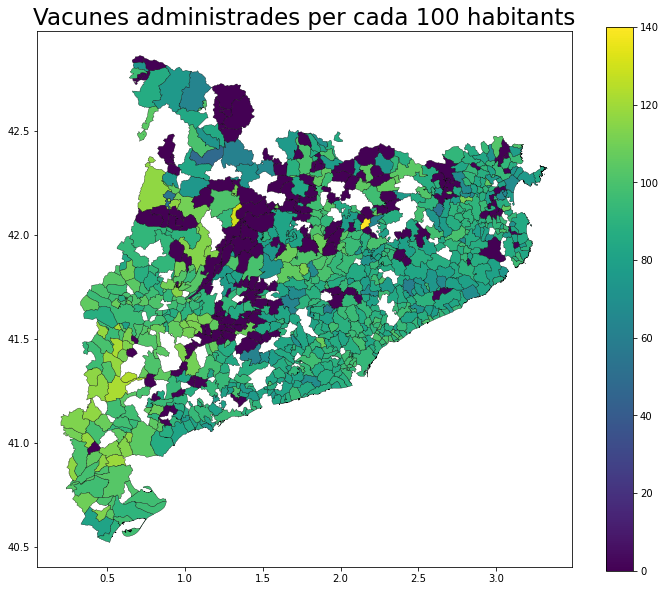

In [21]:
fig, ax = plt.subplots(1, figsize=(12,10))
gdf.plot(column='Taxa_vacun', cmap='viridis', linewidth=0.3, ax=ax, edgecolor='black', legend = True)
ax.axis('on')
plt.title("Vacunes administrades per cada 100 habitants", fontsize=23)


# Choropleth map with GeoPlot

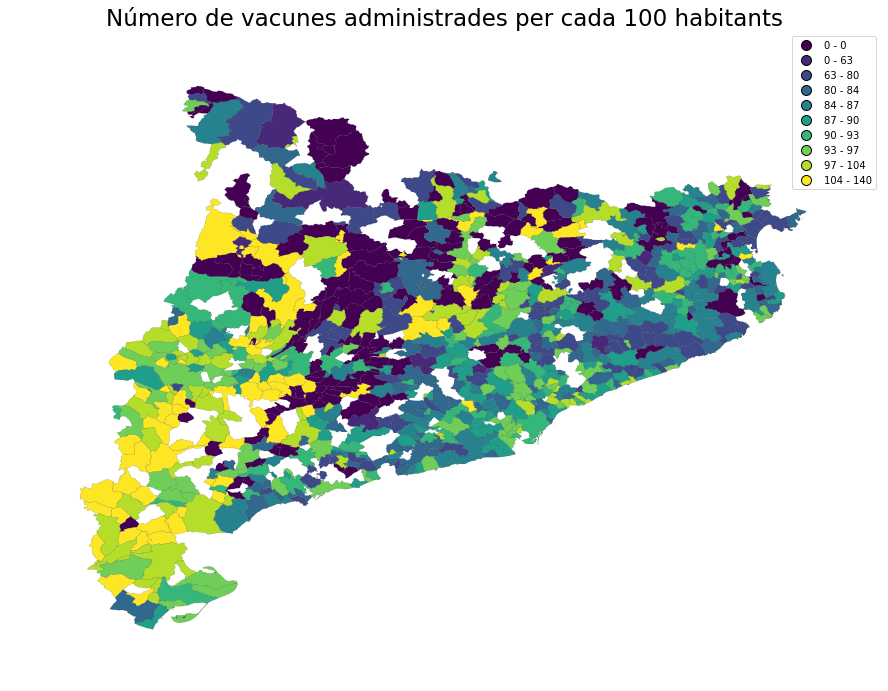

In [23]:
# Initialize the figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Set up the color scheme:
import mapclassify as mc
scheme = mc.Quantiles(gdf['Taxa_vacun'], k=10) # number of divisions in lengend

# Map
gplt.choropleth(gdf, 
    hue="Taxa_vacun", 
    linewidth=.1,
    scheme=scheme,
    cmap='viridis',
    legend=True,
    edgecolor='black',
    ax=ax
);

ax.set_title('Número de vacunes administrades per cada 100 habitants', fontsize=23);